<a href="https://colab.research.google.com/github/dibyanshujha12345/C-119-PROJECT/blob/main/C119PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import csv
import plotly.express as px

col_names=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']
df=pd.read_csv("titanic.csv",names=col_names).iloc[1:]


In [3]:
features=['PassengerId','Pclass','Sex','Age','SibSp','Parch']
X=df[features]
Y=df.Survived



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier()

clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_pred))

0.6828358208955224


In [5]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 294.5<br/>gini = 0.49<br/>samples = 7<br/>v

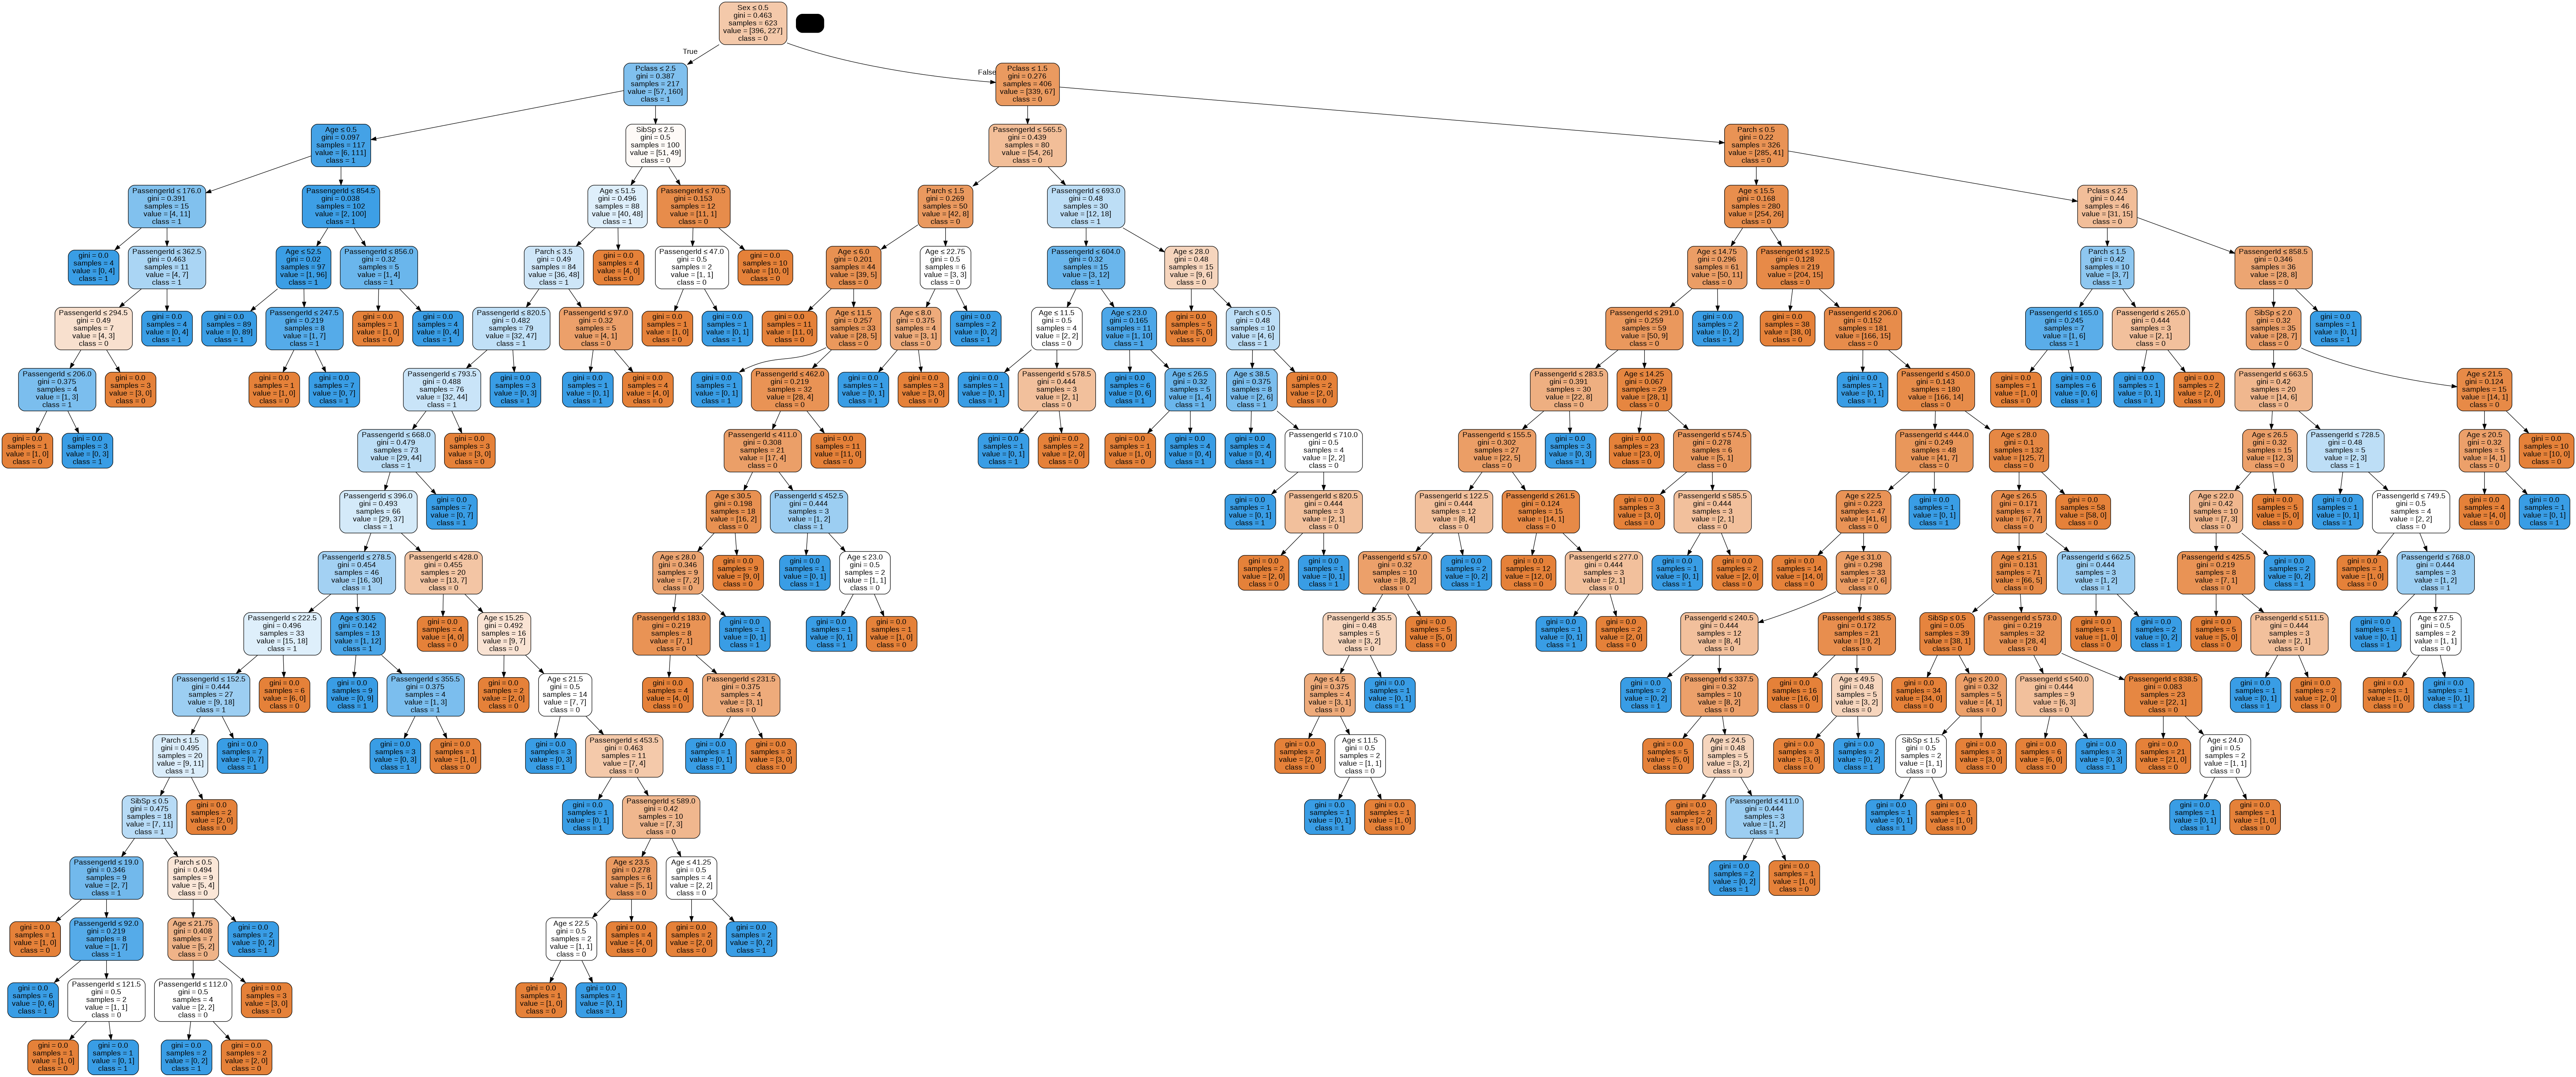

In [7]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('titanic.png')
Image(graph.create_png())

0.746268656716418


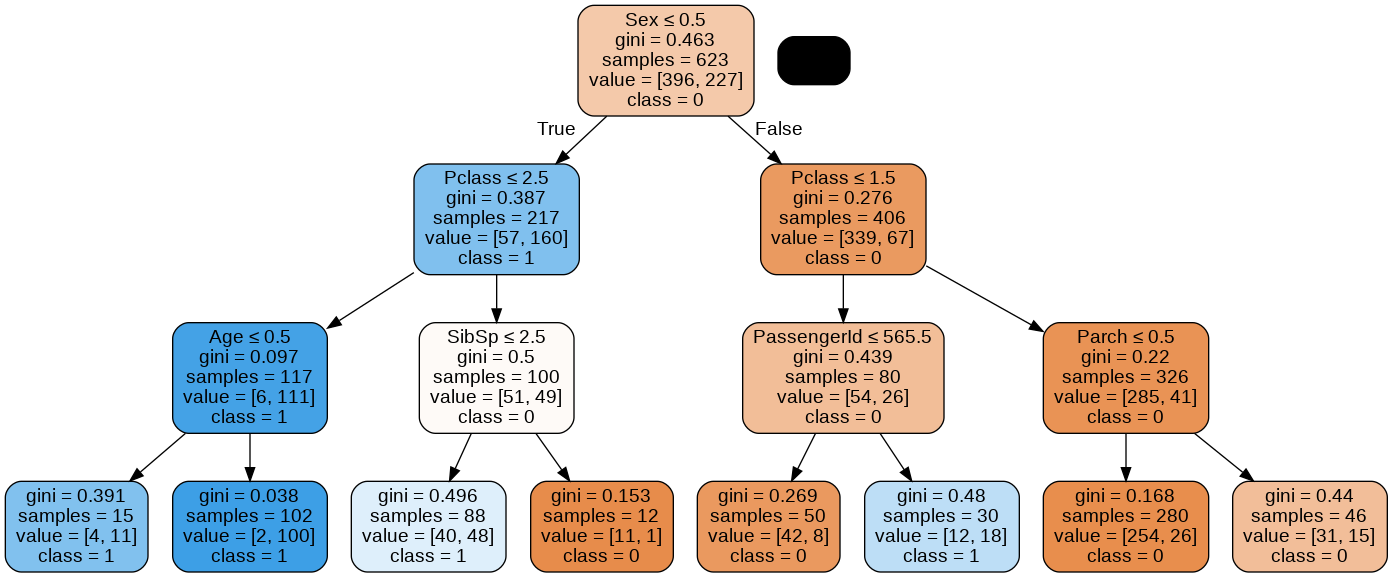

In [8]:
clf=DecisionTreeClassifier(max_depth=3)

clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_pred))

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

# print(dot_data.getvalue())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('titanic.png')
Image(graph.create_png())